In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [5]:
df_kmeans = df.drop(columns=['name'])
df_kmeans

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6
...,...,...,...
145,5.2,4.6,6.9
146,6.0,4.6,6.7
147,5.5,5.7,7.7
148,0.0,6.1,5.2


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, n_init='auto', random_state=42)
kmeans.fit(df_kmeans)

c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\ghummatova\AppData\Local\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ghummatova\AppData\Local\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, 

KMeans(n_clusters=2, random_state=42)

In [6]:
kmeans.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [7]:
df_kmeans.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [8]:
kmeans.cluster_centers_

array([[0.596, 5.13 , 5.006],
       [4.192, 4.314, 6.262]])

In [13]:
kmeans3 = KMeans(n_clusters=3, n_init ='auto', random_state=42)
kmeans3.fit(df_kmeans)

c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [14]:
kmeans3.labels_

array([0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0], dtype=int32)

In [15]:
kmeans3.cluster_centers_

array([[0.596     , 5.13      , 5.006     ],
       [5.14375   , 4.52708333, 6.63958333],
       [3.31346154, 4.11730769, 5.91346154]])

In [16]:
# save in the dataframe

cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns =df_kmeans.columns)
cluster_centers3

,books,tv_shows,video_games
0,0.596000,5.130000,5.006000
1,5.143750,4.527083,6.639583
2,3.313462,4.117308,5.913462


<Axes: >

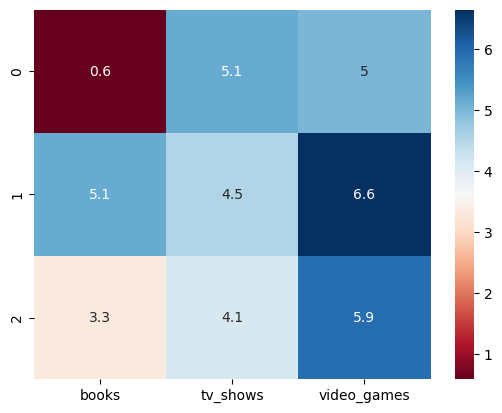

In [19]:
import seaborn as sns
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True)

### DBSCAN and silhoutte score

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [6]:
df_dbscan = df.drop(columns=['name'])

In [7]:
dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan.fit(df_dbscan)

DBSCAN()

In [8]:
dbscan.labels_

array([ 0, -1,  0,  1,  1,  1,  1,  1,  0,  1, -1,  0,  0,  0,  0, -1,  1,
        0,  1, -1,  1, -1,  1,  1,  1,  1,  0,  0,  0, -1,  1, -1,  1,  1,
        1,  1,  1, -1,  0,  1,  1,  1, -1,  0, -1,  1,  0, -1,  0, -1,  1,
        1, -1,  1,  1,  1,  0,  1, -1,  1,  0,  0,  0,  1,  1, -1,  0, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  0,  0,  0,
        1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  0,
       -1,  1, -1,  1,  0,  1,  0, -1, -1, -1,  0,  0,  0,  1,  1,  0,  1,
        1,  1, -1, -1,  0,  0, -1, -1,  1,  1,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  0,  0,  1, -1,  1,  1,  1, -1, -1,  0])

-1 means datapoints are outliers

In [9]:
# find the number of clusters
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters

2

In [11]:
silhouette_score(df_dbscan, dbscan.labels_, metric = 'euclidean', sample_size = None)


np.float64(0.3419620951011187)